In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

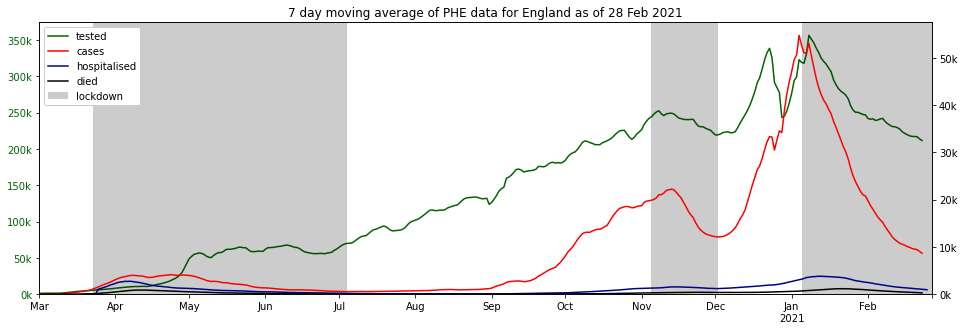

In [2]:
plot_summary(earliest_date='2020-03-01')

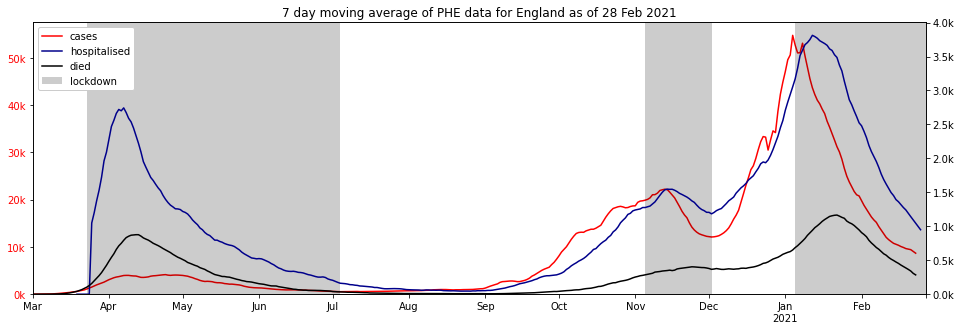

In [3]:
plot_summary(earliest_date='2020-03-01', left_series=(s.new_cases_sum,), 
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,590547.0,17051245.0,16460698.0,56286961,1.049172,29.244247,69.706581
1,Northern Ireland,N92000002,32665.0,520996.0,488331.0,1893667,1.724960,25.787586,72.487454
2,Scotland,S92000003,76512.0,1593695.0,1517183.0,5463300,1.400472,27.770450,70.829078
3,Wales,W92000004,96408.0,923615.0,827207.0,3152879,3.057777,26.236560,70.705663


'partial: 20,089,551'

'full: 796,132'

66796807

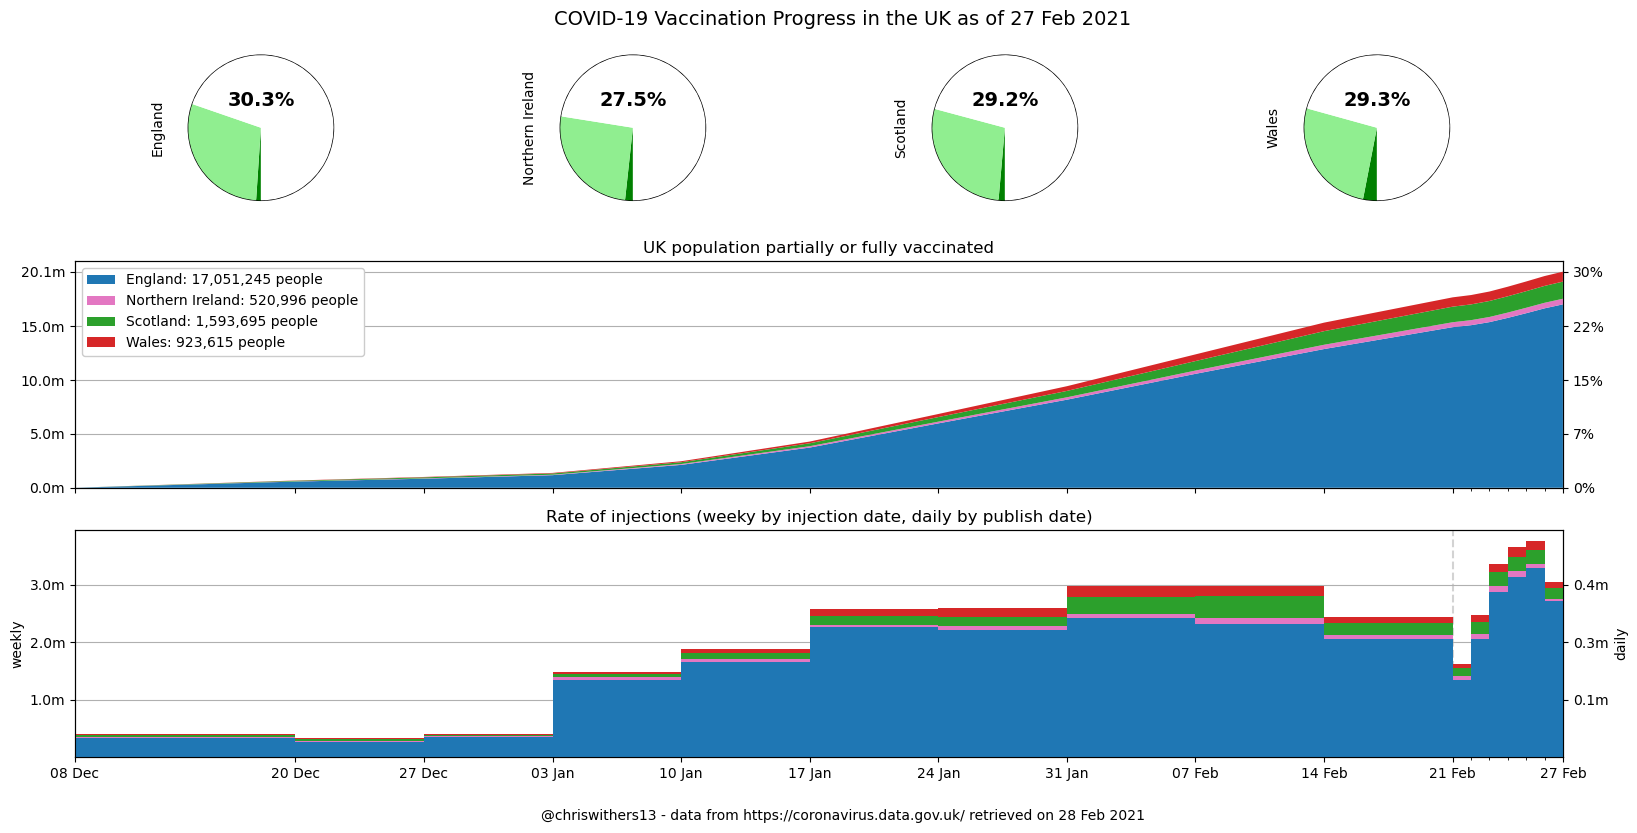

In [4]:
results = vaccination_dashboard()
display(results, f"partial: {results['any'].sum():,.0f}", f"full: {results['full'].sum():,.0f}", results['population'].sum())

In [5]:
vaccination_changes()

,,First Dose (New),Second Dose (New),Complete (New),First Dose (Total),Second Dose (Total),Complete (Total)
,,,,,,,
England,27 Feb 21,"+371,364","+15,584","+15,584","+17,051,245","+590,547","+590,547"
Northern Ireland,27 Feb 21,"+5,318",+49,+49,"+520,996","+32,665","+32,665"
Scotland,27 Feb 21,"+23,542","+4,334","+4,334","+1,593,695","+76,512","+76,512"
Wales,27 Feb 21,"+7,279","+7,355","+7,355","+923,615","+96,408","+96,408"


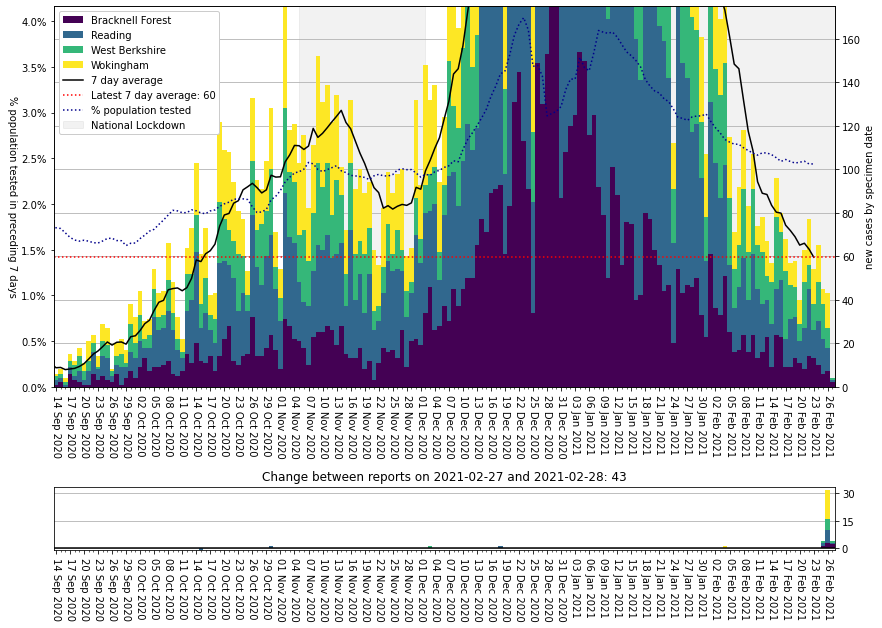

In [6]:
plot_areas(for_date, areas=my_areas, earliest='2020-09-14', ylim=175)

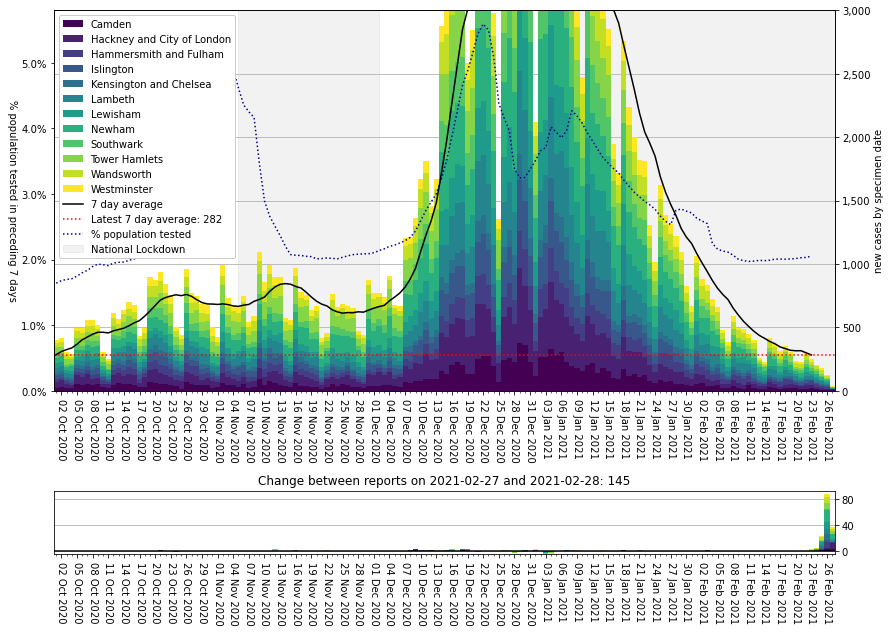

In [7]:
plot_areas(for_date, areas=london_areas, ylim=3_000)

In [8]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [9]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E07000150,Corby,186.934005,135.0,2021-02-27
E07000134,North West Leicestershire,181.447916,188.0,2021-02-27
E06000016,Leicester,179.829712,637.0,2021-02-27
E07000010,Fenland,169.857634,173.0,2021-02-27
E07000140,South Holland,164.177691,156.0,2021-02-27
E07000170,Ashfield,157.131913,201.0,2021-02-27
E08000028,Sandwell,155.274775,510.0,2021-02-27
E07000236,Redditch,154.818733,132.0,2021-02-27
E07000174,Mansfield,154.601923,169.0,2021-02-27


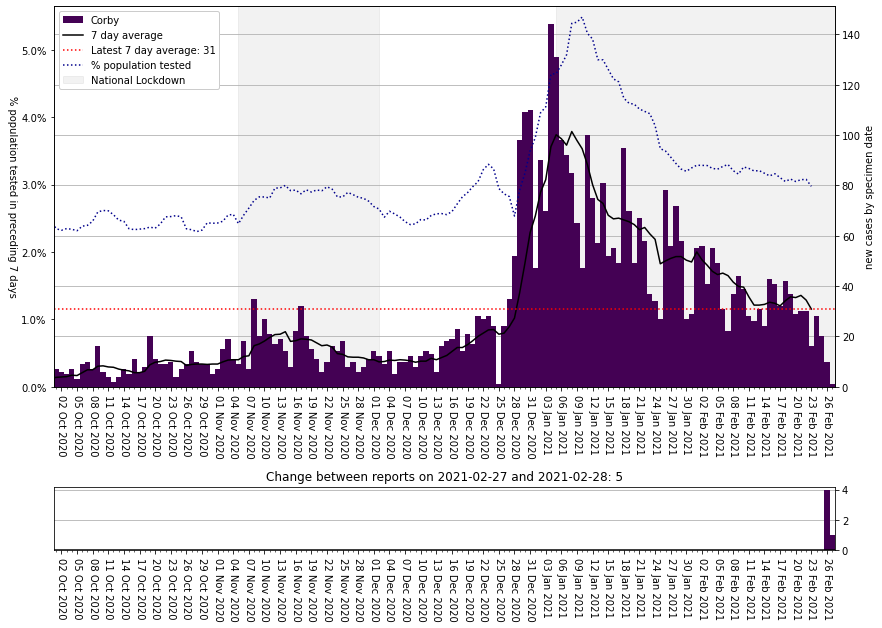

In [10]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [11]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000025,Birmingham,105.446061,1204.0,2021-02-27
E08000035,Leeds,116.625207,925.0,2021-02-27
E08000032,Bradford,144.689649,781.0,2021-02-27
S12000049,Glasgow City,106.614860,675.0,2021-02-27
E06000016,Leicester,179.829712,637.0,2021-02-27
E08000003,Manchester,113.048920,625.0,2021-02-27
E08000019,Sheffield,98.828253,578.0,2021-02-27
E08000034,Kirklees,124.833158,549.0,2021-02-27
E08000028,Sandwell,155.274775,510.0,2021-02-27


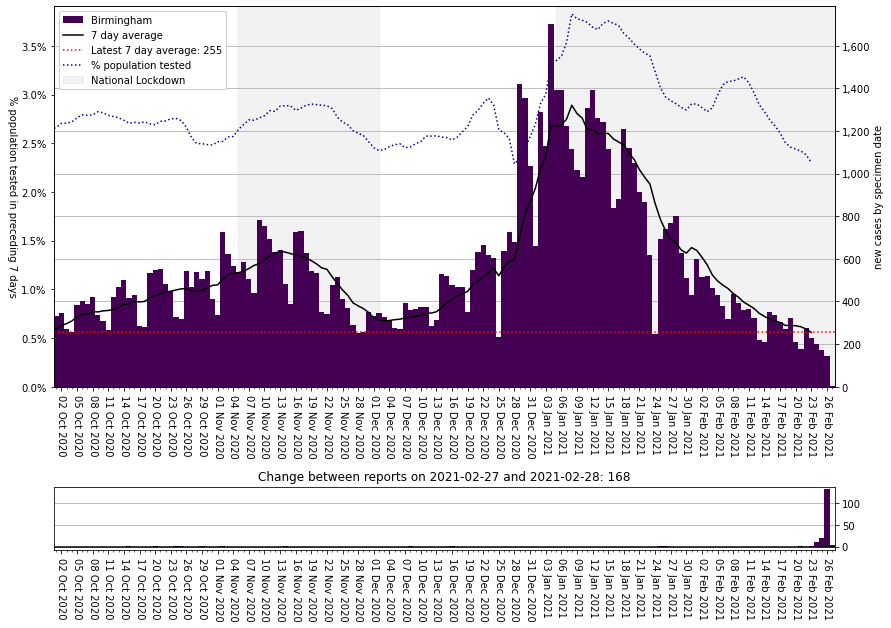

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [13]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 1.3
phe_max = 0.30

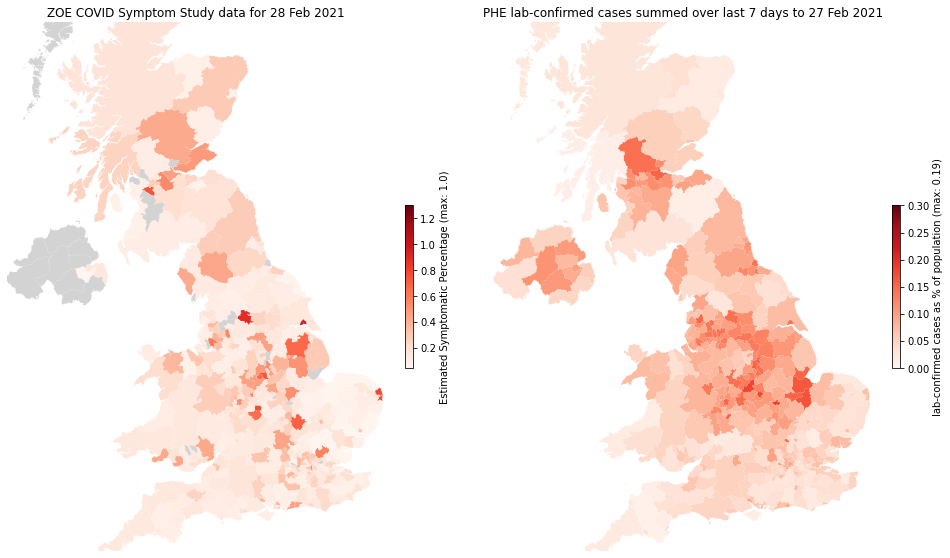

In [14]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [15]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...

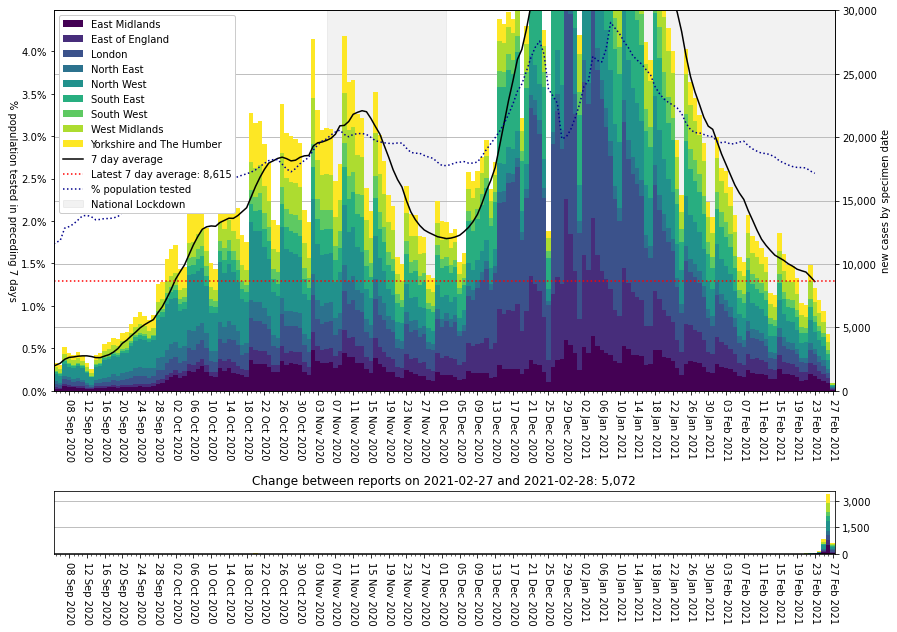

In [16]:
plot_areas(for_date, area_type=region, ylim=30_000, earliest='2020-09-05')

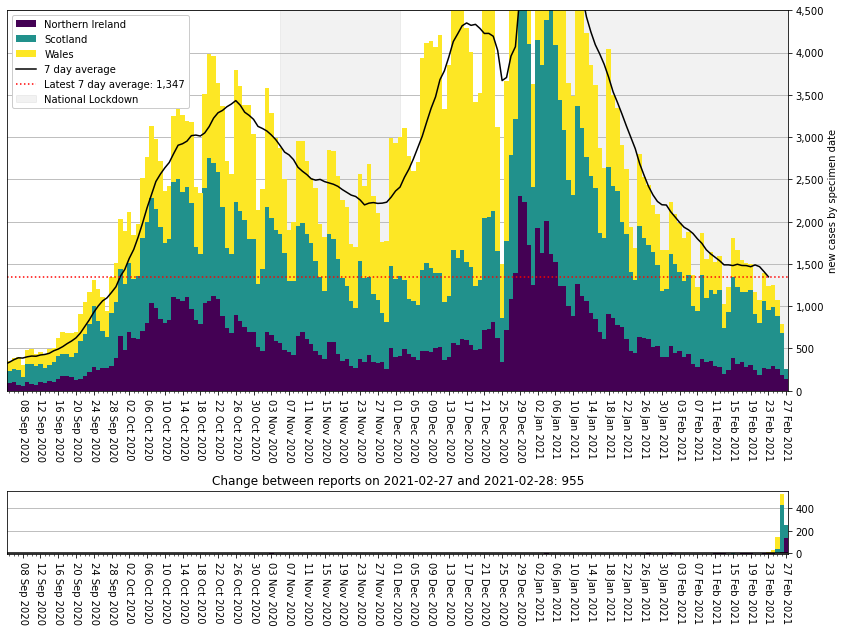

In [17]:
plot_areas(for_date, 'cases_devolved', ylim=4_500, diff_ylims=None, earliest='2020-09-05')